In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import recall_score
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv(r"export.csv")
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Appointment_DayOfMonth,Appointment_WeekOfYear,ScheduledDay_year,ScheduledDay_month,ScheduledDay_DayOfWeek,ScheduledDay_DayOfMonth,ScheduledDay_WeekOfYear,ScheduledDay_Hour,ScheduledDay_Minute,Gender_index
0,3.476624e+10,5636907,M,2016-04-28T16:32:12.000Z,2016-05-05T00:00:00.000Z,5,PRAIA DO SUÁ,0,0,0,...,5,18,2016,4,5,28,17,16,32,1.0
1,3.476624e+10,5666329,M,2016-05-05T16:29:13.000Z,2016-05-12T00:00:00.000Z,5,PRAIA DO SUÁ,0,0,0,...,12,19,2016,5,5,5,18,16,29,1.0
2,3.476624e+10,5692753,M,2016-05-12T16:10:37.000Z,2016-05-19T00:00:00.000Z,5,PRAIA DO SUÁ,0,0,0,...,19,20,2016,5,5,12,19,16,10,1.0
3,7.523668e+14,5637091,F,2016-04-28T17:11:02.000Z,2016-05-05T00:00:00.000Z,69,PRAIA DO SUÁ,0,0,0,...,5,18,2016,4,5,28,17,17,11,0.0
4,7.132994e+14,5636802,F,2016-04-28T16:07:12.000Z,2016-05-05T00:00:00.000Z,9,ENSEADA DO SUÁ,0,0,0,...,5,18,2016,4,5,28,17,16,7,0.0


In [3]:
data = data.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show','Gender', 'Diabetes'])

Modeling

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis=1),
                                                    data['label'],
                                                    test_size=0.2,
                                                    random_state=42)

In [5]:
ros = RandomUnderSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [6]:
gbct = GradientBoostingClassifier(max_depth=4,
                                  min_samples_leaf=4,
                                 n_estimators=100,
                                  learning_rate =0.5)

gbct.fit(X_ros, y_ros)


y_pred_gbct = gbct.predict(X_test)

In [7]:
#y_pred = gbct.predict(X_test)
print("recall score:", recall_score(y_test, y_pred_gbct))
print("accuracy score:", accuracy_score(y_test, y_pred_gbct))

recall score: 0.7824820788530465
accuracy score: 0.6157882831938476


In [9]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred_gbct)

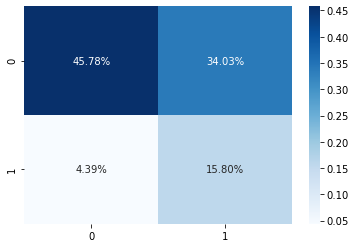

In [10]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

In [ ]:
import pickle

with open('gradient_boosting.model', "wb") as archivo_salida:
    pickle.dump(gbct, archivo_salida)